<a href="https://colab.research.google.com/github/Aleks-cmyk/neural-netw/blob/master/lab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Лабораторна робота 8

студентки КН-31

Мензатюк Олександри

# Завдання 1
Знайти в інтернеті матеріал за напрямком дисципліни, що не розглядався на лекціях

**Мережа хопфілда** - мережа зі зворотним зв'язком, яка формує
асоціативну пам'ять. 

# Завдання 2
Навести приклад розв'язання відповідного завдання.
Завдання: На вхід мережі подається картинка. Мережа запам'ятовує шаблон (чорно білий). Потім на вхід мережі подається ця ж картинка з якимось шумом (я намаоювала окуляри). Завдання мережі - прибрати захисні окуляри.

In [ ]:
import numpy as np
import random
from PIL import Image
import os
import re
from IPython.display import Image as im
from IPython.display import display

In [ ]:
# convert matrix to a vector
def mat2vec(x):
    m = x.shape[0]*x.shape[1]
    tmp1 = np.zeros(m)

    c = 0
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            tmp1[c] = x[i,j]
            c +=1
    return tmp1

In [ ]:
# Create Weight matrix for a single image
def create_W(x):
    if len(x.shape) != 1:
        print("The input is not vector")
        return
    else:
        w = np.zeros([len(x),len(x)])
        for i in range(len(x)):
            for j in range(i,len(x)):
                if i == j:
                    w[i,j] = 0
                else:
                    w[i,j] = x[i]*x[j]
                    w[j,i] = w[i,j]
    return w


In [ ]:
# Read Image file and convert it to Numpy array
def readImg2array(file,size, threshold= 145):
    pilIN = Image.open(file).convert(mode="L")
    pilIN= pilIN.resize(size)
    imgArray = np.asarray(pilIN,dtype=np.uint8)
    x = np.zeros(imgArray.shape,dtype=np.float32)
    x[imgArray > threshold] = 1
    x[x==0] = -1
    return x

In [ ]:
# Convert Numpy array to Image file like Jpeg
def array2img(data, outFile = None):

    y = np.zeros(data.shape,dtype=np.uint8)
    y[data==1] = 255
    y[data==-1] = 0
    img = Image.fromarray(y,mode="L")
    if outFile is not None:
        img.save(outFile)
    return img

In [ ]:
# Update
def update(w,y_vec,theta=0.5,time=100):
    for s in range(time):
        m = len(y_vec)
        i = random.randint(0,m-1)
        u = np.dot(w[i][:],y_vec) - theta

        if u > 0:
            y_vec[i] = 1
        elif u < 0:
            y_vec[i] = -1

    return y_vec

In [ ]:
# Training
# Initial setting
def hopfield(train_files, test_files,theta=0.5, time=1000, size=(100,100),threshold=60, current_path=None):

    # read image and convert it to Numpy array
    print("Importing images and creating weight matrix....")

    # num_files is the number of files
    num_files = 0
    for path in train_files:
        print(path)
        x = readImg2array(file=path,size=size,threshold=threshold)
        x_vec = mat2vec(x)
        print(len(x_vec))
        if num_files == 0:
            w = create_W(x_vec)
            num_files = 1
        else:
            tmp_w = create_W(x_vec)
            w = w + tmp_w
            num_files +=1

    print("Weight matrix is done!!")

    # Import test data
    counter = 0
    for path in test_files:
        y = readImg2array(file=path,size=size,threshold=threshold)
        oshape = y.shape
        y_img = array2img(y)
        y_img.show()
        print("Imported test data")

        y_vec = mat2vec(y)
        print("Updating...")
        y_vec_after = update(w=w,y_vec=y_vec,theta=theta,time=time)
        y_vec_after = y_vec_after.reshape(oshape)
        if current_path is not None:
            outfile = current_path+"/after_"+str(counter)+".jpeg"
            array2img(y_vec_after,outFile=outfile)
        else:
            after_img = array2img(y_vec_after,outFile=None)
            after_img.show()
        counter +=1

In [ ]:
# Main
# First, you can create a list of input file path
current_path = os.getcwd()
train_paths = []
path = current_path+"/train_pics/"
for i in os.listdir(path):
    if re.match(r'[0-9a-zA-Z-]*.jp[e]*g',i):
        train_paths.append(path+i)

# Second, you can create a list of sunglases file path
test_paths = []
path = current_path+"/test_pics/"
for i in os.listdir(path):
    if re.match(r'[0-9a-zA-Z-_]*.jp[e]*g',i):
        test_paths.append(path+i)

In [ ]:
hopfield(train_files=train_paths, test_files=test_paths, theta=0.5,time=20000,size=(100,100),threshold=60, current_path = current_path)

Importing images and creating weight matrix....
/content/train_pics/yosuke.jpg
10000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


Weight matrix is done!!
Imported test data
Updating...


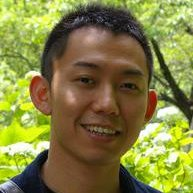

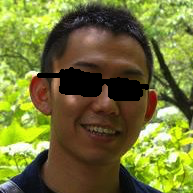

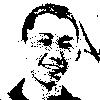

In [ ]:
display(im(train_paths[0], width=250, height=250))
display(im(test_paths[0], width=250, height=250))
display(im('after_0.jpeg', width=250, height=250))


# Висновок
В результаті виконання лабораторної роботи було вивчено принцип роботи та властивості мережі Хопфілда. Також було свформовано завдання, яке можна виконати за допомогою даної мережі. Було створено і протетстовано мережу Хопфілда, що виконала завдання запам'ятовування і відтворення зображення.